# Regression Example - Temperature

This is the regression example with temperature data for working with _SeqRep_ package.

You can [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MIR-MU/seqrep/blob/main/examples/RegressionExample-Temperature.ipynb)
or
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/MIR-MU/seqrep/main?labpath=examples%2FRegressionExample-Temperature.ipynb).


## Install _SeqRep_ Package

In [2]:
# !pip uninstall numpy -y # Numpy is originally installed in Google Colab.
# import numpy
# del numpy # By default, Numpy is imported into Google Colab.

import sys
sys.modules.pop('numpy')

!pip install seqrep

     |████████████████████████████████| 115 kB 6.0 MB/s 
     |████████████████████████████████| 303 kB 33.7 MB/s 
     |████████████████████████████████| 15.3 MB 45.0 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=b22370fd7488fae37d779c2d06b52702f80daa18a7290586a27e06e54b42a373
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28908 sha256=3f3653a0023b99f3e41de623bd0f7ee6142a04a324a4d78999f72df5ae2b5f1d
  Stored in directory: /root/.cache/pip/wheels/72/78/64/cc1c01506a1010a9845e9bd7c69333730f7174661228ea4f98
Successfully built pandas-ta ta
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully 

## Import Needed Packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, HuberRegressor, TheilSenRegressor

from seqrep import *
from seqrep.feature_engineering import *
from seqrep.labeling import *
from seqrep.splitting import *
from seqrep.scaling import *
from seqrep.feature_reduction import *
from seqrep.evaluation import *
from seqrep.pipeline_evaluation import *

In [5]:
def highlight(x, value=min):
    """
    Helper function for higligting particular cells in dataframe.
    """
    return ["font-weight: bold" if v == value(x) else "" for v in x]

## Download Dataset

In [6]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv

--2022-01-20 09:53:20--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/plain]
Saving to: ‘daily-min-temperatures.csv’

daily-min-temperatu 100%[===================>]  66.33K  --.-KB/s    in 0.01s   

2022-01-20 09:53:20 (4.51 MB/s) - ‘daily-min-temperatures.csv’ saved [67921/67921]



In [7]:
df = pd.read_csv(
    "daily-min-temperatures.csv",
    index_col=0,
    parse_dates=True,
)
df

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [8]:
df.isna().sum()

Temp    0
dtype: int64

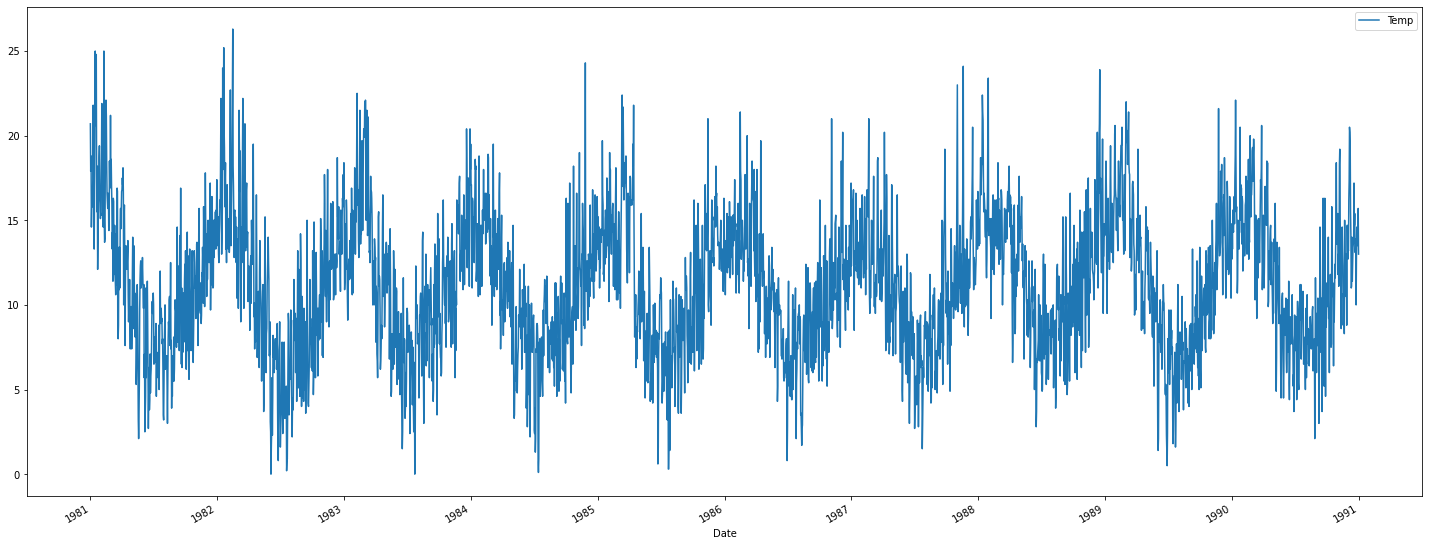

In [9]:
df.plot(figsize=(25, 10))
plt.show()

## Simple Approach
In this section, only the original temperature values (one feature) is used.

In [10]:
# This DataFrame collects the results of various runs for comparison.

# Uncomment following line if you want to clear the DataFrame with the results.
# del results_for_comparison

try:
    results_for_comparison
except NameError:
    print("Create new empty DataFrame.")
    results_for_comparison = pd.DataFrame()
else:
    print("DataFrame already exist!")

Create new empty DataFrame.


In [11]:
%%capture --no-stdout --no-display

pipe = Pipeline(
    [
        ("scale_u", UniversalScaler(scaler=MinMaxScaler())),
    ]
)

pipe_eval = PipelineEvaluator(
    labeler=RegressionLabeler(positive="Temp", negative="Temp", base="Temp"),
    splitter=TrainTestSplitter(),
    pipeline=pipe,
    evaluator=RegressionEvaluator(),
)

models = [
    LinearRegression(),
    MLPRegressor(shuffle=False),
    HuberRegressor(),
    TheilSenRegressor(),
]

for model in models:
    print()
    print(model)
    pipe_eval.model = model
    result = pipe_eval.run(data=df)

    results_for_comparison = results_for_comparison.append(
        pd.Series(result, name=f"Simple pipeline with {str(pipe_eval.model)} model"),
    )


LinearRegression()
09:53:21.291 Labeling data
09:53:21.376 Splitting data
09:53:21.378 Fitting pipeline
09:53:21.383 Applying pipeline transformations
09:53:21.391 	Original shape:		(2737, 1); 
		shape after removing NaNs: (2737, 1).
09:53:21.396 	Original shape:		(913, 1); 
		shape after removing NaNs: (913, 1).
09:53:21.396 Fitting model
09:53:21.422 Predicting
09:53:21.424 Evaluating predictions
MAE:  1.9697 
MSE:  6.2517
RMSE: 2.5003
R2:   0.1090


MLPRegressor(shuffle=False)
09:53:21.433 Labeling data
09:53:21.460 Splitting data
09:53:21.468 Fitting pipeline
09:53:21.475 Applying pipeline transformations
09:53:21.483 	Original shape:		(2737, 1); 
		shape after removing NaNs: (2737, 1).
09:53:21.488 	Original shape:		(913, 1); 
		shape after removing NaNs: (913, 1).
09:53:21.488 Fitting model
09:53:22.247 Predicting
09:53:22.253 Evaluating predictions
MAE:  1.9686 
MSE:  6.2489
RMSE: 2.4998
R2:   0.1094


HuberRegressor()
09:53:22.265 Labeling data
09:53:22.308 Splitting data
09:5

In [12]:
results_for_comparison.reset_index().style.apply(
    highlight, subset=["MAE", "MSE", "RMSE"]
).apply(highlight, subset=["R2"], value=max)

,index,MAE,MSE,R2,RMSE
0,Simple pipeline with LinearRegression() model,1.969663,6.251703,0.109041,2.500341
1,Simple pipeline with MLPRegressor(shuffle=False) model,1.968607,6.248888,0.109443,2.499778
2,Simple pipeline with HuberRegressor() model,1.968107,6.247563,0.109631,2.499513
3,Simple pipeline with TheilSenRegressor(max_subpopulation=10000) model,1.965983,6.250710,0.109183,2.500142


## Approach with Feature Engineering (FE)

Derived features (calculated from the original temperature) are added for this approach.

In [13]:
# This DataFrame collects the results of various runs for comparison.

# Uncomment following line if you want to clear the DataFrame with the results.
# del results_approach_FS

try:
    results_approach_FS
except NameError:
    print("Create new empty DataFrame.")
    results_approach_FS = pd.DataFrame()
else:
    print("DataFrame already exist!")

Create new empty DataFrame.


In [14]:
%%capture --no-stdout --no-display

pipe = Pipeline(
    [
        ("fext_prev", PreviousValuesExtractor()),
        ("fext_prev2", PreviousValuesExtractor(shift=2)),
        ("fext_prev3", PreviousValuesExtractor(shift=3)),
        (
            "fext_time",
            TimeFeaturesExtractor(
                intervals=["weekday", "day", "weekofyear", "month", "year"]
            ),
        ),
        (
            "fext_func0",
            FuncApplyFeatureExtractor(
                func=lambda x: x.rolling(10).mean(), columns_to_apply="Temp"
            ),
        ),
        (
            "fext_func1",
            FuncApplyFeatureExtractor(
                func=lambda x: x.rolling(20).mean(),
                columns_to_apply="Temp",
                rsuffix="-",
            ),
        ),
        # ('fext0', HRVExtractor(columns=["Temp"])),
        ("fext0", HRVExtractor()),
        ("scale_u", UniversalScaler(scaler=MinMaxScaler())),
    ]
)

pipe_prep = PipelineEvaluator(
    labeler=RegressionLabeler(positive="Temp", negative="Temp", base="Temp"),
    splitter=TrainTestSplitter(),
    pipeline=pipe,
    feature_reductor=UnivariateFeatureSelector(number=0.8),
)

pipe_prep.run(data=df)
print()

for model in models:
    print()
    print(model)
    pipe_eval = PipelineEvaluator(
        model=model,
        evaluator=RegressionEvaluator(),
    )
    for attribute in ["X_train", "X_test", "y_train", "y_test"]:
        value = getattr(pipe_prep, attribute)
        setattr(pipe_eval, attribute, value)

    result = pipe_eval.run()

    results_approach_FS = results_approach_FS.append(
        pd.Series(
            result,
            name=f"Approach with FE with {str(pipe_eval.model)} model_{models.index(model)}",
        ),
    )

09:53:23.782 Labeling data
09:53:23.810 Splitting data
09:53:23.813 Fitting pipeline


Calculating columns:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating methods:   0%|          | 0/6 [00:00<?, ?it/s]

09:53:33.558 Applying pipeline transformations


Calculating columns:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating methods:   0%|          | 0/6 [00:00<?, ?it/s]

09:53:36.815 	Original shape:		(2737, 47); 
		shape after removing NaNs: (2709, 41).
09:53:36.823 	Original shape:		(913, 47); 
		shape after removing NaNs: (885, 41).
09:53:36.823 Applying feature reduction


LinearRegression()
09:53:36.884 	Original shape:		(2709, 32); 
		shape after removing NaNs: (2709, 32).
09:53:36.890 	Original shape:		(885, 32); 
		shape after removing NaNs: (885, 32).
09:53:36.891 Fitting model
09:53:36.913 Predicting
09:53:36.922 Evaluating predictions
MAE:  1.8393 
MSE:  5.4513
RMSE: 2.3348
R2:   0.2271


MLPRegressor(shuffle=False)
09:53:36.952 	Original shape:		(2709, 32); 
		shape after removing NaNs: (2709, 32).
09:53:36.966 	Original shape:		(885, 32); 
		shape after removing NaNs: (885, 32).
09:53:36.967 Fitting model
09:53:39.234 Predicting
09:53:39.240 Evaluating predictions
MAE:  1.8153 
MSE:  5.2622
RMSE: 2.2940
R2:   0.2539


HuberRegressor()
09:53:39.259 	Original shape:		(2709, 32); 
		shape after removing NaNs: (2709, 32).
09:53:39.266 	Origina

In [15]:
results_approach_FS.reset_index().style.apply(
    highlight, subset=["MAE", "MSE", "RMSE"]
).apply(highlight, subset=["R2"], value=max)

,index,MAE,MSE,R2,RMSE
0,Approach with FE with LinearRegression() model_0,1.839309,5.451337,0.227065,2.334810
1,Approach with FE with MLPRegressor(shuffle=False) model_1,1.815348,5.262226,0.253878,2.293954
2,Approach with FE with HuberRegressor() model_2,1.831603,5.446642,0.227730,2.333804
3,Approach with FE with TheilSenRegressor(max_subpopulation=10000) model_3,1.846175,5.475528,0.223635,2.339985


## Approach with (FE) and Feature Reduction (FR)

In this case, not only derived features are added but they are reduced by feature selection.

In [16]:
# This DataFrame collects the results of various runs for comparison.

# Uncomment following line if you want to clear the DataFrame with the results.
# del results_approach_FS_FR

try:
    results_approach_FS_FR
except NameError:
    print("Create new empty DataFrame.")
    results_approach_FS_FR = pd.DataFrame()
else:
    print("DataFrame already exist!")

Create new empty DataFrame.


In [17]:
%%capture --no-stdout --no-display

pipe = Pipeline(
    [
        ("fext_prev", PreviousValuesExtractor()),
        ("fext_prev2", PreviousValuesExtractor(shift=2)),
        ("fext_prev3", PreviousValuesExtractor(shift=3)),
        (
            "fext_time",
            TimeFeaturesExtractor(
                intervals=["weekday", "day", "weekofyear", "month", "year"]
            ),
        ),
        (
            "fext_func0",
            FuncApplyFeatureExtractor(
                func=lambda x: x.rolling(10).mean(), columns_to_apply="Temp"
            ),
        ),
        (
            "fext_func1",
            FuncApplyFeatureExtractor(
                func=lambda x: x.rolling(20).mean(),
                columns_to_apply="Temp",
                rsuffix="-",
            ),
        ),
        # ('fext0', HRVExtractor(columns=["Temp"])),
        ("fext0", HRVExtractor()),
        ("scale_u", UniversalScaler(scaler=MinMaxScaler())),
    ]
)

pipe_prep = PipelineEvaluator(
    labeler=RegressionLabeler(positive="Temp", negative="Temp", base="Temp"),
    splitter=TrainTestSplitter(),
    pipeline=pipe,
    feature_reductor=UnivariateFeatureSelector(number=0.6),
)

pipe_prep.run(data=df)
print()

for model in models:
    print()
    print(model)
    pipe_eval = PipelineEvaluator(
        model=model,
        evaluator=RegressionEvaluator(),
    )
    for attribute in ["X_train", "X_test", "y_train", "y_test"]:
        value = getattr(pipe_prep, attribute)
        setattr(pipe_eval, attribute, value)

    result = pipe_eval.run()

    results_approach_FS_FR = results_approach_FS_FR.append(
        pd.Series(
            result,
            name=f"Approach with FE and FR with {str(pipe_eval.model)} model_{models.index(model)}",
        ),
    )

09:53:44.031 Labeling data
09:53:44.058 Splitting data
09:53:44.060 Fitting pipeline


Calculating columns:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating methods:   0%|          | 0/6 [00:00<?, ?it/s]

09:53:53.415 Applying pipeline transformations


Calculating columns:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating methods:   0%|          | 0/6 [00:00<?, ?it/s]

09:53:56.589 	Original shape:		(2737, 47); 
		shape after removing NaNs: (2709, 41).
09:53:56.598 	Original shape:		(913, 47); 
		shape after removing NaNs: (885, 41).
09:53:56.598 Applying feature reduction


LinearRegression()
09:53:56.654 	Original shape:		(2709, 24); 
		shape after removing NaNs: (2709, 24).
09:53:56.659 	Original shape:		(885, 24); 
		shape after removing NaNs: (885, 24).
09:53:56.659 Fitting model
09:53:56.667 Predicting
09:53:56.677 Evaluating predictions
MAE:  1.8327 
MSE:  5.4131
RMSE: 2.3266
R2:   0.2325


MLPRegressor(shuffle=False)
09:53:56.714 	Original shape:		(2709, 24); 
		shape after removing NaNs: (2709, 24).
09:53:56.726 	Original shape:		(885, 24); 
		shape after removing NaNs: (885, 24).
09:53:56.728 Fitting model
09:53:59.777 Predicting
09:53:59.784 Evaluating predictions
MAE:  1.8020 
MSE:  5.2118
RMSE: 2.2829
R2:   0.2610


HuberRegressor()
09:53:59.802 	Original shape:		(2709, 24); 
		shape after removing NaNs: (2709, 24).
09:53:59.808 	Origina

In [18]:
results_approach_FS_FR.reset_index().style.apply(
    highlight, subset=["MAE", "MSE", "RMSE"]
).apply(highlight, subset=["R2"], value=max)

,index,MAE,MSE,R2,RMSE
0,Approach with FE and FR with LinearRegression() model_0,1.832721,5.413058,0.232492,2.326598
1,Approach with FE and FR with MLPRegressor(shuffle=False) model_1,1.801957,5.211805,0.261027,2.282938
2,Approach with FE and FR with HuberRegressor() model_2,1.826840,5.415173,0.232192,2.327052
3,Approach with FE and FR with TheilSenRegressor(max_subpopulation=10000) model_3,1.835684,5.420226,0.231476,2.328138


## Result Comparison

In [19]:
results_for_comparison.append(results_approach_FS).append(
    results_approach_FS_FR
).reset_index().style.apply(highlight, subset=["MAE", "MSE", "RMSE"]).apply(
    highlight, subset=["R2"], value=max
)

,index,MAE,MSE,R2,RMSE
0,Simple pipeline with LinearRegression() model,1.969663,6.251703,0.109041,2.500341
1,Simple pipeline with MLPRegressor(shuffle=False) model,1.968607,6.248888,0.109443,2.499778
2,Simple pipeline with HuberRegressor() model,1.968107,6.247563,0.109631,2.499513
3,Simple pipeline with TheilSenRegressor(max_subpopulation=10000) model,1.965983,6.250710,0.109183,2.500142
4,Approach with FE with LinearRegression() model_0,1.839309,5.451337,0.227065,2.334810
5,Approach with FE with MLPRegressor(shuffle=False) model_1,1.815348,5.262226,0.253878,2.293954
6,Approach with FE with HuberRegressor() model_2,1.831603,5.446642,0.227730,2.333804
7,Approach with FE with TheilSenRegressor(max_subpopulation=10000) model_3,1.846175,5.475528,0.223635,2.339985
8,Approach with FE and FR with LinearRegression() model_0,1.832721,5.413058,0.232492,2.326598
9,Approach with FE and FR with MLPRegressor(shuffle=False) model_1,1.801957,5.211805,0.261027,2.282938


We can see that **adding features** has improved the results.

Further improvement has been achieved through the selection of suitable features.